In [1]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_tweets_filtered = pd.read_csv("data/cleaned_data/df_tweets_cleaned.csv").drop(columns = ["Unnamed: 0"])
df_tweets_filtered.dropna(inplace=True)

In [3]:
df_tweets_filtered

,topic,tweet,tweets_cleaned
0,Obesity,@squirrelwheel @sunheadbowed lymphoedema is a ...,lymphoedema build lymph fluid happen super mor...
1,Sugar tax,Bruh i paid $1.25 for an arizona in Philly cau...,bruh paid arizona philly cause sugar ntcplqyhbz
2,Obesity,@MikeSington Obesity,obesity
3,Obesity,@TheLost_Lord yeah i think its important cus a...,yeah think important really think obesity choi...
4,Sugar tax,A recent study claimed that the UK's soft drin...,recent study claimed soft drink industry levy ...
...,...,...,...
114,Sugar tax,@swaggysuperswag sugar tax is now hurting hard...,sugar hurting hard working shrine maiden happy
115,Sugar tax,@NoContextBrits Sugar Tax was a dumb idea. Now...,sugar dumb idea fizzy sugar sweetener call
116,Obesity,@JamesJo56909490 I'm betting there was 0% issu...,betting issue obesity
117,Obesity,‘Breakthrough’ obesity drugs that have stunned...,breakthrough obesity drug stunned researcher g...


In [4]:
labels = df_tweets_filtered[["topic"]].reset_index(drop = True)
text = df_tweets_filtered[["tweets_cleaned"]].reset_index(drop = True)
countVectorizer = CountVectorizer(max_df=6, min_df=1, max_features=1000, strip_accents="ascii") 
countVector = countVectorizer.fit_transform(df_tweets_filtered['tweets_cleaned'])
words = countVectorizer.get_feature_names()
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abnormal,absolute,academic,accept,accommodate,according,account,accounting,acexnyng,...,wrong,wulnawba,yeah,yearly,young,youth,ysnmy,ytqkjato,yximygyiu,zarlsixr
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
num_topics = 4

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(count_vect_df)

In [18]:
print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

SIZE:  (119, 4)


In [19]:
# Let's see how the first document in the corpus looks like in
## different topic spaces
print("First headline...")
print(LDA_DH_Model[0])
print("Sixth headline...")
print(LDA_DH_Model[5])

First headline...
[0.0138983  0.01393431 0.01389897 0.95826842]
Sixth headline...
[0.08343875 0.74964307 0.08344654 0.08347163]


In [20]:
#print(lda_model_DH.components_)


## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

In [21]:
####### call the function above with our model and CountV
print_topics(lda_model_DH, countVectorizer, 15)

Topic:   0
[('think', 5.249795116096229), ('product', 4.256481886125355), ('cause', 4.251989170665071), ('diet', 4.250366565867059), ('cancer', 4.244483259839543), ('dont', 3.252739407305125), ('sugary', 3.251567976240717), ('study', 3.249699609369711), ('bill', 3.2484287762811594), ('reduced', 3.248233928083971), ('strategy', 2.255448497639802), ('industry', 2.249891071340089), ('line', 2.2498127290007504), ('calorie', 2.2496597085070174), ('soft', 2.2495706509053446)]
Topic:   1
[('video', 5.253384998318358), ('rate', 5.252936579593907), ('time', 5.251636737312622), ('game', 4.251261088315594), ('literally', 4.250665313908563), ('half', 4.247751269036669), ('clinically', 4.24769869094118), ('woman', 4.247668283113654), ('body', 4.247594507369874), ('state', 3.2570704344480808), ('come', 3.2550972988892566), ('policy', 3.2526111620033524), ('effect', 3.2522513834016586), ('alone', 3.2498927565199813), ('united', 3.2484230205678326)]
Topic:   2
[('never', 4.254514965457065), ('experien

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
## Print LDA using print function from above
########## Other Notes ####################
#import pyLDAvis.sklearn as LDAvis
#import pyLDAvis
#import pyLDAvis.gensim 
## conda install -c conda-forge pyldavis
#pyLDAvis.enable_notebook() ## not using notebook
#panel = LDAvis.prepare(lda_model_DH, MyDTM_DF, MyCountV, mds='tsne')
#pyLDAvis.show(panel)
#panel = pyLDAvis.gensim.prepare(lda_model_DH, MyDTM, MyCountV, mds='tsne')
#pyLDAvis.show(panel)
##########################################################################

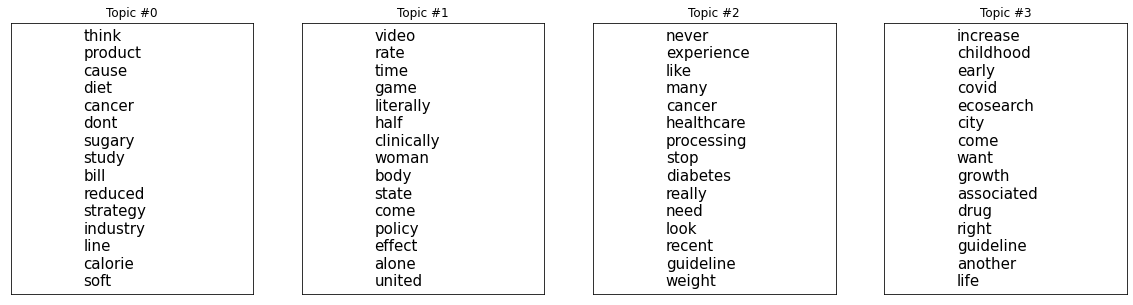

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,5)
vocab = countVectorizer.get_feature_names()
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=15)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis


# ## conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook() ## not using notebook

#print(lda_model_DH.components_)
#print(Vect_DH)
#print(MyVectLDA_DH)

## GOT IT!!

panel = LDAvis.prepare(lda_model_DH, countVector, countVectorizer, mds='tsne')

pyLDAvis.save_html(panel, "Dog_Hike_Topics.html")


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(
C:\Users\Akhilesh\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
